In [9]:
#IMPORTACION DE LIBRERIAS PARA LA MUESTRA DE LA MATRIZ DE EFECTIVIDAD
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#DATOS SOBRE LAS FOTOGRAFIAS Y SU TAMAÑO DE GESTIONAMIENTO
width_shape = 80
height_shape = 80
batch_size = 1
#NUMERO DE CLASES 
names = ['Fase 0','Fase 1','Fase 2','Fase 3','Fase 4','Fase 5','Fase 6','Fase 7','Fase 8','Fase 9',]
#FUENTE DE DATOS PARA TEST
test_data_dir = './Dataset/test'  
#IMAGEDATAGENERATOR PARA LA CONFIGURACION DE RECUPERACION DE INFORMAION
test_datagen = ImageDataGenerator()
#CONFIGURACION DE FUNCION PARA GENERAR DATOS PARA EL TEST
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(width_shape, height_shape), 
    batch_size = batch_size,
    class_mode='categorical', 
    shuffle=False)
#INFO DEL MODELO GENERADO A RAIZ DEL ENTRENAMIENTO
custom_Model= load_model("./modelo/modelo.h5")
#GENERACION DE LAS PREDICCIONES
predictions = custom_Model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_real = test_generator.classes

Found 448 images belonging to 10 classes.
448/448 [==============================] - 30s 66ms/step


In [10]:
matc=confusion_matrix(y_real, y_pred)

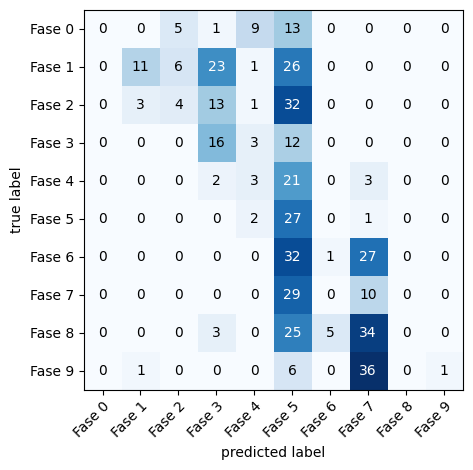

In [11]:
#GRAFICACION DE LOS DATOS Y SUS PREDICCIONES
plot_confusion_matrix(conf_mat = matc, class_names = names, show_normed=False)
plt.tight_layout()

In [12]:
#TABLA PARA VERIFICACION DE PARAMETROS DE CLASIFICACION
print(metrics.classification_report(y_real,y_pred, digits = 7))

              precision    recall  f1-score   support

           0  0.0000000 0.0000000 0.0000000        28
           1  0.7333333 0.1641791 0.2682927        67
           2  0.2666667 0.0754717 0.1176471        53
           3  0.2758621 0.5161290 0.3595506        31
           4  0.1578947 0.1034483 0.1250000        29
           5  0.1210762 0.9000000 0.2134387        30
           6  0.1666667 0.0166667 0.0303030        60
           7  0.0900901 0.2564103 0.1333333        39
           8  0.0000000 0.0000000 0.0000000        67
           9  1.0000000 0.0227273 0.0444444        44

    accuracy                      0.1629464       448
   macro avg  0.2811590 0.2055032 0.1292010       448
weighted avg  0.3070159 0.1629464 0.1213368       448



C:\entornoPy\env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\entornoPy\env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\entornoPy\env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
